## Observations and Insights 

In [353]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np

# Study data files
mouse_metadata_path = "C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_05_Matplotlib\\Homework\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_05_Matplotlib\\Homework\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [354]:
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [355]:
study_results = study_results.rename(columns={'Tumor Volume (mm3)':'Tumor Volume'})

In [356]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [357]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [358]:
mouse_study.dtypes

Mouse ID             object
Drug Regimen         object
Sex                  object
Age_months            int64
Weight (g)            int64
Timepoint             int64
Tumor Volume        float64
Metastatic Sites      int64
dtype: object

In [560]:
# Checking the number of mice.
mouse_study["Mouse ID"].count()

1893

In [561]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study[mouse_study.duplicated(['Timepoint', 'Mouse ID'], keep = False)]

In [562]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dupes)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume  Metastatic Sites  
908     45.000000                 0  
909     45.000000                 0  
910     48.786801                 0  
911     47.570392                 0  
912     51.745156

In [563]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study.drop([908, 909], axis=0)

In [564]:
mouse_study = mouse_study.drop([910, 911, 912, 913, 914, 915, 917], axis=0)

In [565]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].count()

1884

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

In [569]:
regimen_stats = pd.DataFrame({"Mean": mouse_study.groupby(["Drug Regimen"]).mean()["Tumor Volume"],
                             "Median": mouse_study.groupby(["Drug Regimen"]).median()["Tumor Volume"], 
                             "Variance": mouse_study.groupby(["Drug Regimen"]).var()["Tumor Volume"],
                             "Standard Deviation": mouse_study.groupby(["Drug Regimen"]).std()["Tumor Volume"],
                             "SEM": mouse_study.groupby(["Drug Regimen"]).sem()["Tumor Volume"]})   

format_stats_dict = {'Mean': '{:.2f}', 'Median': '{:.2f}', 'Variance': '{:.2f}', 
                     'Standard Deviation': '{:.2f}', 'SEM': '{:.2f}'}

regimen_stats.style.format(format_stats_dict)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.48,50.91,43.82,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [342]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

<IPython.core.display.Javascript object>


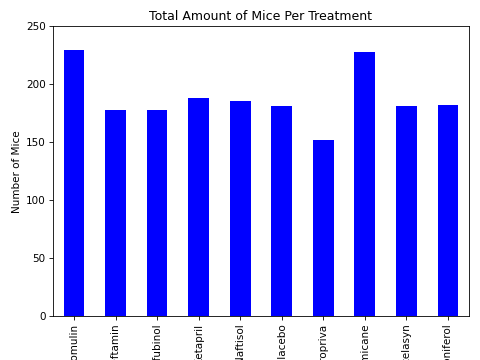

In [677]:
bar_one =plt.figure()
plt.title("Total Amount of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_mice)+20)
plt.tight_layout()
plt.show()
mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind='bar',
                            color="b", align="center") #, figsize= [8.5, 5])


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

In [657]:
regimen_mice = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
#regimen_mice

In [605]:
number_of_mice = regimen_mice.to_list()

<IPython.core.display.Javascript object>


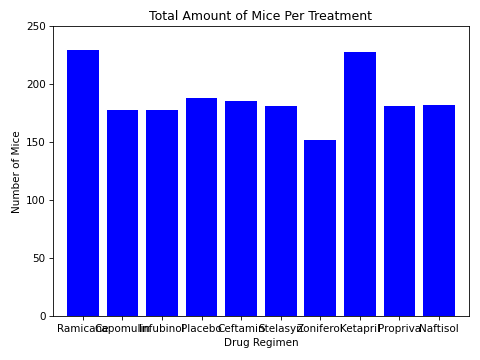

In [667]:
bar_two =plt.figure()
plt.bar(x_axis, number_of_mice, color="b", align="center")
number_of_mice = regimen_mice.to_list()
x_axis=np.arange(len(number_of_mice))
plt.bar(x_axis, number_of_mice, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_mice)+20)
plt.title("Total Amount of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

<IPython.core.display.Javascript object>


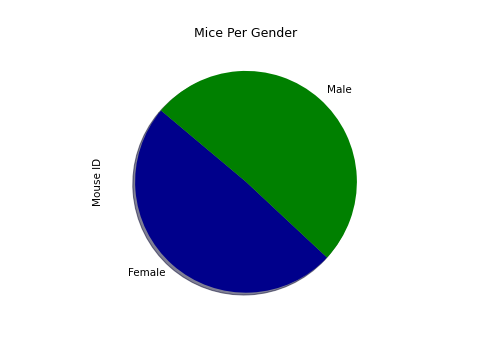

In [671]:
pie_one =plt.figure()
mouse_study.groupby(["Sex"]).count()["Mouse ID"].plot(kind="pie", shadow=True, startangle=140,
                       colors=colors, subplots=True)
labels = ["Female", "Male"]
sizes = [935, 958]
colors = ["darkblue", "green"]
plt.title("Mice Per Gender")
plt.show()

In [622]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

<IPython.core.display.Javascript object>


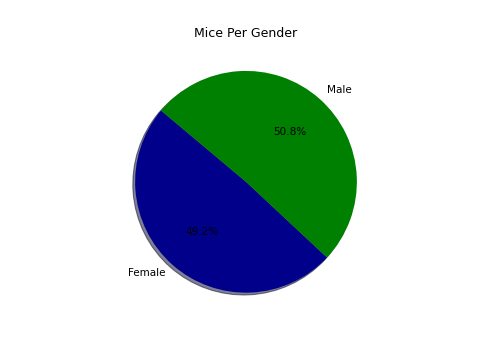

In [674]:
pie_two =plt.figure()
sections = mouse_study.groupby(["Sex"]).count()["Mouse ID"]
plt.pie(sections,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mice Per Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
